<a href="https://colab.research.google.com/github/OmkarDhekane/Data-science-projects/blob/main/Seminar_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB1
from tqdm import tqdm
%matplotlib inline

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Dataset/Seminar/data_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/Seminar/data_test.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/Dataset/Seminar/data_valid.csv')
print(train_df.head(3))
print(test_df.head(3))
print(validation_df.head(3))

                    img  healthy  leaf_rust  ...  septoria  stem_rust  yellow_rust
0  0000000181ffff7e.jpg        0          1  ...         0          0            0
1  0000001f9fff9e3c.jpg        0          0  ...         0          0            1
2  000000427f7e3c3c.jpg        0          1  ...         0          0            0

[3 rows x 8 columns]
                    img  healthy  leaf_rust  ...  septoria  stem_rust  yellow_rust
0  0000000001ffffff.jpg        0          1  ...         0          0            0
1  00000000ffffffff.jpg        0          1  ...         0          0            0
2  00000003c3ff7f3e.jpg        0          1  ...         0          0            0

[3 rows x 8 columns]
                    img  healthy  leaf_rust  ...  septoria  stem_rust  yellow_rust
0  000000009fffffff.jpg        0          1  ...         0          0            0
1  00000004fffffffe.jpg        0          1  ...         0          0            0
2  0000010301bfe7ff.jpg        0          0

In [3]:
!unzip '/content/drive/MyDrive/Dataset/Seminar/wfd_dataset.zip'

Archive:  /content/drive/MyDrive/Dataset/Seminar/wfd_dataset.zip
   creating: wfd_dataset/
  inflating: wfd_dataset/0000000001ffffff.jpg  
  inflating: wfd_dataset/000000009fffffff.jpg  
  inflating: wfd_dataset/00000000ffffffff.jpg  
  inflating: wfd_dataset/0000000181ffff7e.jpg  
  inflating: wfd_dataset/00000003c3ff7f3e.jpg  
  inflating: wfd_dataset/00000004fffffffe.jpg  
  inflating: wfd_dataset/00000010ffffffff.jpg  
  inflating: wfd_dataset/0000001efffffffc.jpg  
  inflating: wfd_dataset/0000001f9fff9e3c.jpg  
  inflating: wfd_dataset/000000427f7e3c3c.jpg  
  inflating: wfd_dataset/000000ffffc3cded.jpg  
  inflating: wfd_dataset/00000101d9f9ffff.jpg  
 extracting: wfd_dataset/0000010301bfe7ff.jpg  
  inflating: wfd_dataset/000003374e5fcfff.jpg  
  inflating: wfd_dataset/0000035f29ef7efe.jpg  
  inflating: wfd_dataset/000004fcffeffcec.jpg  
  inflating: wfd_dataset/000008183bffffff.jpg  
  inflating: wfd_dataset/00000828ff3f20b6.jpg  
  inflating: wfd_dataset/00000c7e9e1f1fff.jpg

In [4]:
validation_df.shape

(480, 8)

In [5]:
test_df.shape

(480, 8)

In [6]:
train_df.shape

(1454, 8)

In [7]:
validation_df.head(3)
X_valid_images = []
for i in tqdm(range(validation_df.shape[0])):
  img = image.load_img('wfd_dataset/'+validation_df['img'][i],target_size=(240,240,3))
  img = image.img_to_array(img)
  img = img/255
  X_valid_images.append(img)
  
X_validation = np.array(X_valid_images)

100%|██████████| 480/480 [01:11<00:00,  6.72it/s]


In [8]:
test_df.head(3)
X_test_images = []
for i in tqdm(range(test_df.shape[0])):
  img = image.load_img('wfd_dataset/'+test_df['img'][i],target_size=(240,240,3))
  img = image.img_to_array(img)
  img = img/255
  X_test_images.append(img)
  
X_test = np.array(X_test_images)

100%|██████████| 480/480 [01:09<00:00,  6.94it/s]


In [9]:
train_df.head(3)
X_train_images = []
for i in tqdm(range(train_df.shape[0])):
  img = image.load_img('wfd_dataset/'+train_df['img'][i],target_size=(240,240,3))
  img = image.img_to_array(img)
  img = img/255
  X_train_images.append(img)
  
X_train = np.array(X_train_images)

100%|██████████| 1454/1454 [03:36<00:00,  6.70it/s]


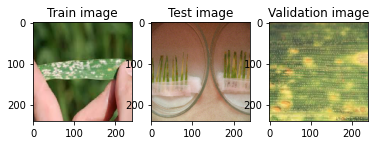

In [10]:
trn = plt.subplot(131)
plt.title("Train image")
trn = plt.imshow(X_train[3])

tst = plt.subplot(132)
plt.title("Test image")
tst = plt.imshow(X_test[3])

vlid = plt.subplot(133)
plt.title("Validation image")
tst = plt.imshow(X_validation[3])

plt.show()

In [11]:
X_validation.shape

(480, 240, 240, 3)

In [12]:
X_test.shape

(480, 240, 240, 3)

In [13]:
X_train.shape

(1454, 240, 240, 3)

In [14]:
X_validation[0]

array([[[0.24313726, 0.09019608, 0.03137255],
        [0.28235295, 0.14117648, 0.08627451],
        [0.27058825, 0.1254902 , 0.05490196],
        ...,
        [0.23921569, 0.12941177, 0.11372549],
        [0.23529412, 0.16078432, 0.09411765],
        [0.25490198, 0.11764706, 0.10196079]],

       [[0.28235295, 0.11764706, 0.03137255],
        [0.2901961 , 0.1254902 , 0.03137255],
        [0.2901961 , 0.09411765, 0.06666667],
        ...,
        [0.31764707, 0.16470589, 0.09803922],
        [0.34117648, 0.2       , 0.10588235],
        [0.32941177, 0.19215687, 0.07450981]],

       [[0.34117648, 0.16470589, 0.08235294],
        [0.32156864, 0.15686275, 0.07058824],
        [0.33333334, 0.14901961, 0.08627451],
        ...,
        [0.20784314, 0.09019608, 0.04705882],
        [0.23137255, 0.11372549, 0.07058824],
        [0.22745098, 0.11764706, 0.07058824]],

       ...,

       [[0.61960787, 0.5647059 , 0.4627451 ],
        [0.60784316, 0.54509807, 0.45490196],
        [0.59607846, 0

In [15]:
y_validation = np.array(validation_df.drop(['img'],axis=1))
y_validation

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [16]:
X_test[0]

array([[[0.34117648, 0.30588236, 0.30980393],
        [0.3372549 , 0.32156864, 0.31764707],
        [0.36078432, 0.3647059 , 0.34509805],
        ...,
        [0.37254903, 0.36862746, 0.36078432],
        [0.39607844, 0.38431373, 0.3647059 ],
        [0.3764706 , 0.36078432, 0.3647059 ]],

       [[0.35686275, 0.35686275, 0.35686275],
        [0.39215687, 0.3529412 , 0.38431373],
        [0.38431373, 0.32941177, 0.3254902 ],
        ...,
        [0.39607844, 0.37254903, 0.38039216],
        [0.36862746, 0.36078432, 0.3647059 ],
        [0.38039216, 0.38431373, 0.3647059 ]],

       [[0.34901962, 0.3254902 , 0.3254902 ],
        [0.35686275, 0.35686275, 0.30980393],
        [0.36862746, 0.34509805, 0.34509805],
        ...,
        [0.45882353, 0.39215687, 0.43137255],
        [0.41960785, 0.4       , 0.3764706 ],
        [0.44705883, 0.4       , 0.4       ]],

       ...,

       [[0.41960785, 0.42745098, 0.50980395],
        [0.45882353, 0.44313726, 0.5411765 ],
        [0.44313726, 0

In [17]:
y_test = np.array(test_df.drop(['img'],axis=1))
y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [18]:
X_train[0]

array([[[0.30588236, 0.24705882, 0.25882354],
        [0.22745098, 0.22352941, 0.20784314],
        [0.23137255, 0.22745098, 0.21176471],
        ...,
        [0.21176471, 0.22352941, 0.24313726],
        [0.21568628, 0.23921569, 0.22352941],
        [0.19607843, 0.2       , 0.18039216]],

       [[0.24313726, 0.22745098, 0.19215687],
        [0.24705882, 0.23529412, 0.2627451 ],
        [0.31764707, 0.23137255, 0.2784314 ],
        ...,
        [0.25882354, 0.21960784, 0.21568628],
        [0.23529412, 0.23921569, 0.21568628],
        [0.22745098, 0.23137255, 0.21176471]],

       [[0.31764707, 0.24705882, 0.3019608 ],
        [0.26666668, 0.2509804 , 0.23921569],
        [0.23137255, 0.24705882, 0.24313726],
        ...,
        [0.19215687, 0.21176471, 0.18431373],
        [0.25490198, 0.2509804 , 0.23529412],
        [0.20392157, 0.1882353 , 0.19215687]],

       ...,

       [[0.30588236, 0.30588236, 0.29803923],
        [0.2901961 , 0.28235295, 0.28627452],
        [0.2784314 , 0

In [19]:
y_train = np.array(train_df.drop(['img'],axis=1))
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [20]:
print("X_validation Size: ",X_validation.shape)
print("y_validation Size: ",y_validation.shape)

X_validation Size:  (480, 240, 240, 3)
y_validation Size:  (480, 7)


In [21]:
print("X_test Size: ",X_test.shape)
print("y_test Size: ",y_test.shape)

X_test Size:  (480, 240, 240, 3)
y_test Size:  (480, 7)


In [22]:
print("X_train Size: ",X_train.shape)
print("y_train Size: ",y_train.shape)

X_train Size:  (1454, 240, 240, 3)
y_train Size:  (1454, 7)


In [65]:
#image augmentation
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [74]:
NUM_CLASSES = 7
IMG_SIZE = 240

inputs = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))

# dense = layers.Dense(10, activation="relu")
# x = dense(inputs)                                 # Attaching input layer to new dense layer
# x = layers.Dense(3, activation="softmax")(x)

# x = img_augmentation(inputs)

outputs = EfficientNetB1(include_top=False, weights='imagenet')(inputs)

# outputs = EfficientNetB1(include_top=False, input_tensor=x, weights='imagenet')(inputs)
# outputs.trainable = False

outputs = layers.GlobalAveragePooling2D()(outputs)
outputs = layers.BatchNormalization()(outputs)
# outputs = layers.Dropout(0.2, name="top_dropout")(outputs)
outputs = layers.Dense(NUM_CLASSES,activation='sigmoid')(outputs)

# outputs = EfficientNetB1(include_top=True, weights=None, classes=NUM_CLASSES, drop_connect_rate=0.4)(inputs)
# outputs = EfficientNetB1(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [75]:
model = tf.keras.Model(inputs, outputs)

Optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
# Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=Optimizer, loss="binary_crossentropy", metrics=["accuracy"] )
# model.compile(optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"] )
# model.compile(optimizer="adam", loss="categorical_cossentropy", metrics=["accuracy"] )

model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 240, 240, 3)]     0         
_________________________________________________________________
efficientnetb1 (Functional)  (None, None, None, 1280)  6575239   
_________________________________________________________________
global_average_pooling2d_8 ( (None, 1280)              0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 1280)              5120      
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 8967      
Total params: 6,589,326
Trainable params: 6,524,711
Non-trainable params: 64,615
_________________________________________________________________


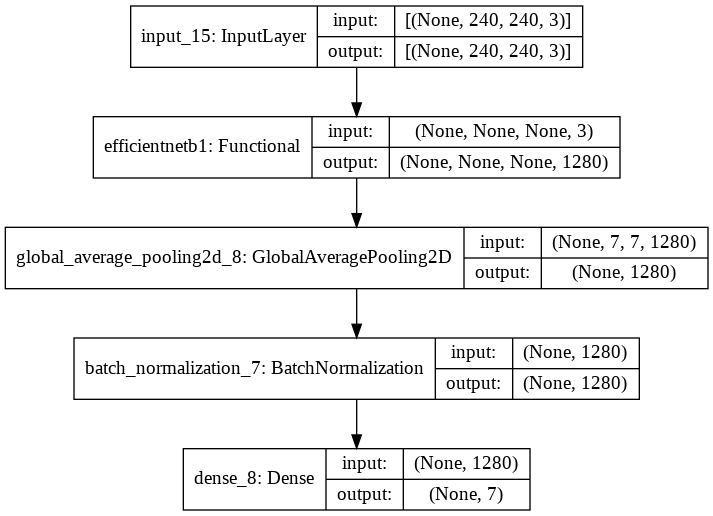

In [76]:
from tensorflow.keras.utils import plot_model
plot_model(model, "my_first_model.png",show_shapes=True)

In [77]:
# from keras import callbacks----------------------------------
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weig-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------hts = True)

hist = model.fit(X_train, y_train, epochs=25,validation_data=(X_validation,y_validation),verbose=2)

# test_scores = model.evaluate(X_train, y_train, verbose=2)
# print("Test loss:", test_scores[0])
# print("Test accuracy:", test_scores[1])

Epoch 1/25
46/46 - 62s - loss: 0.6143 - accuracy: 0.4065 - val_loss: 0.5663 - val_accuracy: 0.1792
Epoch 2/25
46/46 - 42s - loss: 0.3311 - accuracy: 0.6857 - val_loss: 0.5275 - val_accuracy: 0.2729
Epoch 3/25
46/46 - 42s - loss: 0.2044 - accuracy: 0.7730 - val_loss: 0.4994 - val_accuracy: 0.2729
Epoch 4/25
46/46 - 42s - loss: 0.1272 - accuracy: 0.8109 - val_loss: 0.5039 - val_accuracy: 0.2708
Epoch 5/25
46/46 - 42s - loss: 0.0886 - accuracy: 0.8391 - val_loss: 0.5272 - val_accuracy: 0.2792
Epoch 6/25
46/46 - 42s - loss: 0.0590 - accuracy: 0.8411 - val_loss: 0.5985 - val_accuracy: 0.2729
Epoch 7/25
46/46 - 45s - loss: 0.0527 - accuracy: 0.8432 - val_loss: 0.5386 - val_accuracy: 0.2188
Epoch 8/25
46/46 - 42s - loss: 0.0397 - accuracy: 0.8480 - val_loss: 0.6887 - val_accuracy: 0.1271
Epoch 9/25
46/46 - 44s - loss: 0.0296 - accuracy: 0.8576 - val_loss: 0.6256 - val_accuracy: 0.2062
Epoch 10/25
46/46 - 45s - loss: 0.0274 - accuracy: 0.8480 - val_loss: 0.6378 - val_accuracy: 0.1833
Epoch 11/

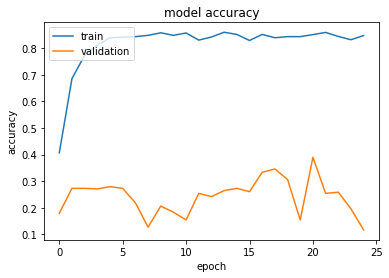

In [78]:
import matplotlib.pyplot as plt

def plot_hist(hist):
  plt.plot(hist.history["accuracy"])
  plt.plot(hist.history["val_accuracy"])
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

plot_hist(hist)